In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Funcția pentru normalizare MinMax
def normalize_minmax(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = (image - min_val) / (max_val - min_val)
    return normalized_image

# Încarcă o imagine
image_path = '/workspaces/lab02-AI/Proiect_Mandibula/Resurse proiect ATM/images-atm/images-atm/coronal-crop/P1.CL1.jpg'
image = Image.open(image_path).convert('L')  # Convert to grayscale if necessary

# Transformă imaginea într-un array numpy
image_array = np.array(image)

# Aplică normalizarea MinMax
normalized_image = normalize_minmax(image_array)

# Vizualizează imaginea originală și imaginea normalizată
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image_array, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Normalized Image (MinMax)')
plt.imshow(normalized_image, cmap='gray')
plt.show()


In [20]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Citirea etichetelor din fișierul CSV
labels_df = pd.read_csv('/workspaces/lab02-AI/Proiect_Mandibula/DateExaminari.csv')

# Definirea calelor către fișierele de imagine și etichete
image_dir = '/workspaces/lab02-AI/Proiect_Mandibula/Imagini'

# Dimensiuni dorite pentru redimensionarea imaginilor
img_height = 224
img_width = 224
num_classes = 4  # exemplu: înlocuiește cu numărul real de clase

# Configurarea generatorului de date pentru preprocesarea imaginilor
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru antrenare
train_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',  # coloana care conține numele imaginilor
    y_col='Disfunctie',  # coloana care conține etichetele
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # folosește subset='training' pentru datele de antrenare
)

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru validare
validation_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',  # coloana care conține numele imaginilor
    y_col='Disfunctie',  # coloana care conține etichetele
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # folosește subset='validation' pentru datele de validare
)

# Definirea modelului
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compilarea modelului
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afisare arhitectura modelului
model.summary()
print("Antrenam")

# Antrenarea modelului
model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)
print("Evaluam")

# Evaluarea modelului pe datele de validare
model.evaluate(validation_generator)
print("Prezicem")
# Predictii
predictions = model.predict(validation_generator)



Found 240 validated image filenames belonging to 4 classes.
Found 59 validated image filenames belonging to 4 classes.


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 109, 109, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    44,302,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,526,212 (169.85 MB)

 Trainable params: 44,526,212 (169.85 MB)

 Non-trainable params: 0 (0.00 B)

Antrenam
Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


: 

In [4]:
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Citirea etichetelor din fișierul CSV
labels_df = pd.read_csv('/workspaces/lab02-AI/Proiect_Mandibula/DateExaminari.csv')

# Definirea calelor către fișierele de imagine și etichete
image_dir = '/workspaces/lab02-AI/Proiect_Mandibula/Imagini/'
labels = labels_df['Imagine'].tolist()
file_names = labels_df['Disfunctie'].tolist()

# Dimensiuni dorite pentru redimensionarea imaginilor
img_height = 224
img_width = 224
num_classes = 4  # exemplu: înlocuiește cu numărul real de clase

# Configurarea generatorului de date pentru preprocesarea imaginilor
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, 
                             rotation_range=20, width_shift_range=0.2, 
                             height_shift_range=0.2, shear_range=0.2, 
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru antrenare
train_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',
    y_col='Disfunctie',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # folosește subset='training' pentru datele de antrenare
)

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru validare
validation_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',
    y_col='Disfunctie',
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # folosește subset='validation' pentru datele de validare
)

# Definirea modelului
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adăugare Dropout
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),  # Adăugare Dropout
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adăugare Dropout
    Dense(num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.005)
# Compilarea modelului
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afisare arhitectura modelului
model.summary()

# Callbacks pentru Early Stopping și Reduce Learning Rate
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ReduceLROnPlateau(patience=2)
]

# Antrenarea modelului
model.fit(train_generator, epochs=14, validation_data=validation_generator, callbacks=callbacks)

# Evaluarea modelului pe datele de validare
model.evaluate(validation_generator)

# Predictii
predictions = model.predict(validation_generator)


Found 236 validated image filenames belonging to 4 classes.
Found 58 validated image filenames belonging to 4 classes.


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    44,302,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,396,228 (169.36 MB)

 Trainable params: 44,396,228 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/14


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4417 - loss: 19.1141 - val_accuracy: 0.5690 - val_loss: 1.3595 - learning_rate: 0.0050
Epoch 2/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5686 - loss: 1.3522 - val_accuracy: 0.5690 - val_loss: 1.3092 - learning_rate: 0.0050
Epoch 3/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5493 - loss: 1.3081 - val_accuracy: 0.5690 - val_loss: 1.2472 - learning_rate: 0.0050
Epoch 4/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5476 - loss: 1.2425 - val_accuracy: 0.5690 - val_loss: 1.1812 - learning_rate: 0.0050
Epoch 5/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5692 - loss: 1.1748 - val_accuracy: 0.5690 - val_loss: 1.1241 - learning_rate: 0.0050
Epoch 6/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5388 - loss: 1.1482 - val_accuracy: 0.5690 - val_loss: 1.0785 - learning_rate: 0.0050
Epoch 7/14
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5486 - loss: 1.1224 - val_accuracy: 0.5690 - val_loss: 1.050

In [12]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Citirea etichetelor din fișierul CSV
labels_df = pd.read_csv('/workspaces/lab02-AI/Proiect_Mandibula/DateExaminari.csv')

# Definirea calelor către fișierele de imagine și etichete
image_dir = '/workspaces/lab02-AI/Proiect_Mandibula/ImagesAll'

# Dimensiuni dorite pentru redimensionarea imaginilor
img_height = 224
img_width = 224
num_classes = 4  # exemplu: înlocuiește cu numărul real de clase

# Configurarea generatorului de date pentru preprocesarea imaginilor
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru antrenare
train_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',  # coloana care conține numele imaginilor
    y_col='Disfunctie',  # coloana care conține etichetele
    target_size=(img_height, img_width),
    color_mode='grayscale',  # modul de culoare alb-negru
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'  # folosește subset='training' pentru datele de antrenare
)

# Încărcarea și preprocesarea imaginilor folosind generatorul de date pentru validare
validation_generator = datagen.flow_from_dataframe(
    dataframe=labels_df,
    directory=image_dir,
    x_col='Imagine',  # coloana care conține numele imaginilor
    y_col='Disfunctie',  # coloana care conține etichetele
    target_size=(img_height, img_width),
    color_mode='grayscale',  # modul de culoare alb-negru
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'  # folosește subset='validation' pentru datele de validare
)

# Definirea modelului
from tensorflow.keras.regularizers import l2

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


# Compilarea modelului
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Afisare arhitectura modelului
model.summary()

# Antrenarea modelului
model.fit(train_generator,
          epochs=10,
          validation_data=validation_generator)

# Evaluarea modelului pe datele de validare
model.evaluate(validation_generator)

# Predictii
predictions = model.predict(validation_generator)


Found 240 validated image filenames belonging to 4 classes.
Found 59 validated image filenames belonging to 4 classes.


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="Imagine". These filename(s) will be ignored.
  warnings.warn(
/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,600,196 (9.92 MB)

 Trainable params: 2,600,196 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.4327 - loss: 1.2350 - val_accuracy: 0.5424 - val_loss: 1.0753
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5724 - loss: 1.1038 - val_accuracy: 0.5424 - val_loss: 1.0568
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5576 - loss: 1.0329 - val_accuracy: 0.5424 - val_loss: 1.0119
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5706 - loss: 0.9095 - val_accuracy: 0.5254 - val_loss: 1.0120
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6201 - loss: 0.8159 - val_accuracy: 0.5085 - val_loss: 1.0265
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6917 - loss: 0.7390 - val_accuracy: 0.4746 - val_loss: 1.0618
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6860 - loss: 0.6739 - val_accuracy: 0.4915 - val_loss: 1.1658
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.6947 - loss: 0.6011 - val_accuracy: 0.5593 - val_loss: 1.1446
Epoch 9/10
8/8 ━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


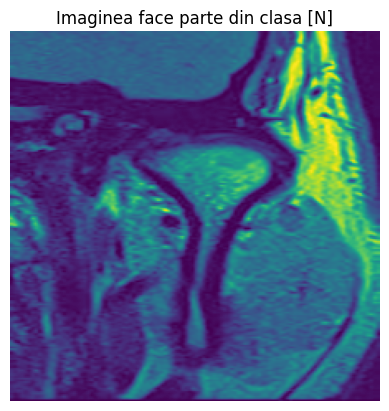

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing import image

# Calea către imaginea pe care dorești să o testezi
image_path = '/workspaces/lab02-AI/Proiect_Mandibula/Imagini/P29.CL1.jpg'

# Dimensiunile pe care modelul tău le așteaptă
img_height, img_width = 224, 224

# Încarcă imaginea folosind PIL
img = Image.open(image_path)

# Redimensionează imaginea la dimensiunile așteptate de model
img = img.resize((img_height, img_width))

# Converti imaginea într-un array numpy
img_array = image.img_to_array(img)

# Expandarea dimensiunii array-ului pentru a o face compatibilă cu formatul de intrare al modelului
img_array = np.expand_dims(img_array, axis=0)

# Preprocesarea imaginii pentru a o normaliza
img_array = img_array / 255.

# Prezicerea clasei imaginii folosind modelul
predictions = model.predict(img_array)

# Creează dicționarul class_names pe baza ordinii claselor din generatorul de date
class_names = {v: k for k, v in train_generator.class_indices.items()}


# Extrage clasa prezisă
predicted_class = np.argmax(predictions, axis=1)[0]

# Afișează imaginea și clasa prezisă
plt.imshow(img)
plt.axis('off')
plt.title(f'Imaginea face parte din clasa {class_names[predicted_class]}')
plt.show()


In [7]:
import os
import pandas as pd

# Citirea etichetelor din fișierul CSV
labels_df = pd.read_csv('/workspaces/lab02-AI/Proiect_Mandibula/DateExaminari.csv')

# Definirea căii către fișierele de imagine
image_dir = '/workspaces/lab02-AI/Proiect_Mandibula/ImagesAll/'

# Verificarea existenței fișierelor
missing_files = []
for filename in labels_df['Imagine']:
    if not os.path.isfile(os.path.join(image_dir, filename)):
        missing_files.append(filename)

print(f"Missing files: {missing_files}")
print(f"Missing files: {len(missing_files)}")
